## Understand how robots perceive the world using a 2D occupancy grid

The idea is to  demonstrates how robots (Autonomous Vehicles (AVs) or mobile robots) perceive their environment using a 2D occupancy grid.
I am using a scenario where we  build a grid world that has obstacles, a target(our end goal) and an agent that moves randomly.

This helps you understand:

How robots represent their world in 2D and how they detect free, obstacles, and unknown spaces

How agents move and handle collisions

In [9]:

import numpy as np
import matplotlib.pyplot as plt
import random

### Step 1

Create the Occupancy Grid

We represent the grid world by creating  a 10×10 matrix where

0 = free space

1 = obstacle

2 = target

3 = agent

This matches how robots store and reason about the world.

In [10]:
grid = np.zeros((10, 10), dtype=int)
occupied = 1
target = 2
agent_value = 3

### Step 2
Add Obstacles & Target

Obstacles could be things like:

parked cars

walls

poles

boundaries

The target represents the goal.

In [11]:
#occupied rows and columns
obstacles = [(2, 3), (4, 4), (5, 2), (7, 8), (1, 6)]
for rows, cols in obstacles:
    grid[rows][cols] = occupied

# the end goal, our target
grid_goal = (5, 5)
grid[grid_goal] = target

### Step 3
Place the Agent

The agent starts at a position (0, 0).

In [12]:
# agent
agent_position = [0, 0]
grid_with_agent = grid.copy()
grid_with_agent[agent_position[0], agent_position[1]] = agent_value

### Step 4
Defining the agent Movement & Collision check

Robots typically move in up, down, left, right directions in grid worlds.
this is good to ensure  the robot understand boundaries and obstacles.

In [13]:
#movement
movement_vector = {
    "up": (-1, 0),
    "down": (1, 0),
    "right": (0 , 1),
    "left": (0, -1),
}


#check if there is an obstacle or agent is out of boundary
def is_collision(new_position, grid):
    rows, cols = grid.shape
    new_row, new_col = new_position

    #if its within boundary
    if new_row < 0 or new_row >= rows or new_col < 0 or new_col >= cols:
        return True, "crossed boundary"
    
    if grid[new_row][new_col] == occupied:
        return True, "its occupied"
    
    return False, None, 

### step 5
moving randomly 

it is just the robot exploring randomly like a naive agent

In [14]:
#take a random step
def random_step(agent_pos, grid):
    directions = list(movement_vector.keys())
    random.shuffle(directions)

    for d in directions:
        change_in_row, change_in_col = movement_vector[d]
        new_position = [agent_pos[0] + change_in_row, agent_pos[1] + change_in_col]

        collided, reason = is_collision(new_position, grid)
        if not collided:
            return new_position, d, None
        else:
            blocked_reason = reason
    return agent_pos, None, blocked_reason

### Step 6
Run Simulation for the agent

The agent moves randomly for a maximum of 80 steps.
We log:

successful movements

blocked attempts

whether the goal is reached

In [15]:
#take steps
path = [tuple(agent_position)]
blocked_attempts = []
max_steps = 80
goal_reached = False


print(f"starting the agent step at {path[0]}")
for step in range( max_steps):
    new_position, direction, blocked_reason = random_step(agent_position, grid)

    if blocked_reason:
        blocked_attempts.append((tuple[agent_position], direction, blocked_reason))
        print(f"Step {step+1}: Blocked {blocked_reason} when trying to move {direction} from {tuple(agent_position)}")

    else:
        agent_position = new_position
        path.append(tuple(agent_position))
        print(f"Step {step+1}: Moved {direction} to {tuple(agent_position)}")

    if tuple(agent_position) == grid_goal:
        print("you have successfully reached the goal")
        goal_reached = True
        break
if not goal_reached:
     print(f"\nCompleted {max_steps} steps without reaching the goal.")


starting the agent step at (0, 0)
Step 1: Moved down to (1, 0)
Step 2: Moved right to (1, 1)
Step 3: Moved left to (1, 0)
Step 4: Moved up to (0, 0)
Step 5: Moved down to (1, 0)
Step 6: Moved right to (1, 1)
Step 7: Moved left to (1, 0)
Step 8: Moved right to (1, 1)
Step 9: Moved right to (1, 2)
Step 10: Moved right to (1, 3)
Step 11: Moved right to (1, 4)
Step 12: Moved down to (2, 4)
Step 13: Moved up to (1, 4)
Step 14: Moved down to (2, 4)
Step 15: Moved down to (3, 4)
Step 16: Moved right to (3, 5)
Step 17: Moved up to (2, 5)
Step 18: Moved down to (3, 5)
Step 19: Moved right to (3, 6)
Step 20: Moved right to (3, 7)
Step 21: Moved up to (2, 7)
Step 22: Moved up to (1, 7)
Step 23: Moved down to (2, 7)
Step 24: Moved up to (1, 7)
Step 25: Moved down to (2, 7)
Step 26: Moved up to (1, 7)
Step 27: Moved right to (1, 8)
Step 28: Moved right to (1, 9)
Step 29: Moved down to (2, 9)
Step 30: Moved down to (3, 9)
Step 31: Moved left to (3, 8)
Step 32: Moved right to (3, 9)
Step 33: Moved up

### step 7
Visualise the Grid, Path and Blocked Steps if any

the aim is to see how robots uses occupancy grid to understand movement efficiency and risk.

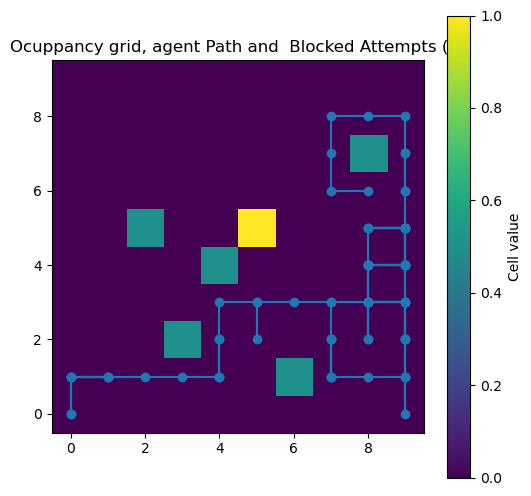

In [16]:
#seperate cordinates
path_rows = [p[0] for p in path]
path_cols = [p[1] for p in path]

fail_rows = [p[0] for p in blocked_attempts]
fail_cols = [p[0] for p in blocked_attempts]


plt.figure(figsize=(6,6))
plt.imshow(grid, cmap="viridis", origin="upper")
plt.plot(path_cols, path_rows, marker = "o", markersize=6, label="path")
plt.scatter(fail_cols,fail_rows,color='red',marker='x', s=150, label='Blocked Attempts')
plt.title("Ocuppancy grid, agent Path and  Blocked Attempts (X)")
plt.colorbar(label="Cell value")
plt.gca().invert_yaxis()
plt.show()


### Thought Process 
How Robots Perceive the World with Occupancy Grids

it is seen that robots build a map of the surrounding world from sensors (LiDAR, radar, cameras) and converts it into an occupancy grid where

Free cells (0) signaling safe to move

Occupied cells (1 )signaling obstacles detected

Goal cells (2) signaling desired destination

Agent cells (3) signaling current robot location

Why Use a Grid?

Grid gives robots a box-like map that is easy to use for path planning and update with new sensor data.

All in all,  this teaches how robots understand free and blocked cells.

How navigation decisions can succeed or fail

How  planning starts with simple grid-based logic